In [1]:
import glob, os
import sys
import numpy as np
import time
import unicodedata
import inspect

# -------------------------------------------- Matplotlib
import matplotlib.pyplot as plt
import matplotlib.colorbar as clb
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib.gridspec as gridspec
from matplotlib import ticker
from matplotlib.ticker import LogLocator
%matplotlib inline


In [2]:
from sklearn.svm import SVC

In [6]:
T_exp = []
T_exp = np.loadtxt('ref/HSRS/222')

print T_exp

max_domain = T_exp[-1,0] + 1
print max_domain

[[  0.00000000e+00   1.78041967e+00]
 [  0.00000000e+00  -2.38163803e+00]
 [  0.00000000e+00  -3.07496885e+00]
 [  0.00000000e+00  -7.93139375e+00]
 [  0.00000000e+00  -1.34112360e+00]
 [  0.00000000e+00   2.12760327e+00]
 [  0.00000000e+00  -7.23806292e+00]
 [  0.00000000e+00   4.20863212e+00]
 [  0.00000000e+00   3.92721650e-01]
 [  0.00000000e+00  -7.23806292e+00]
 [  0.00000000e+00  -8.27857735e+00]
 [  0.00000000e+00  -3.76933605e+00]
 [  0.00000000e+00  -2.03445443e+00]
 [  0.00000000e+00  -4.46266688e+00]
 [  0.00000000e+00   3.86144852e+00]
 [  0.00000000e+00   1.08708885e+00]
 [  0.00000000e+00   2.82093410e+00]
 [  0.00000000e+00   1.78041967e+00]
 [  0.00000000e+00  -5.85036490e+00]
 [  0.00000000e+00   1.08708885e+00]
 [  0.00000000e+00  -4.46266688e+00]
 [  0.00000000e+00  -3.42215245e+00]
 [  0.00000000e+00  -3.00609177e-01]
 [  0.00000000e+00  -2.03445443e+00]
 [  0.00000000e+00   7.39905247e-01]
 [  0.00000000e+00  -7.23806292e+00]
 [  0.00000000e+00   4.20863212e+00]
 

In [32]:
x = T_exp[:,0]
y = T_exp[:,1]


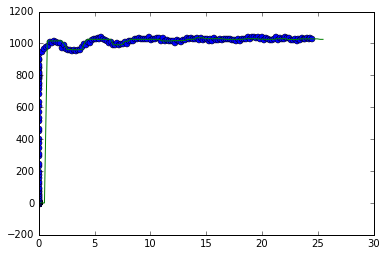

In [39]:
from sklearn.svm import SVC

XX = np.array(x).reshape(-1,1)
y= np.asarray(y,dtype='str')


svcmodel = SVC()
svcmodel.fit(XX,y)

predx = np.linspace(0.,max_domain,100)[:,np.newaxis]
predy = svcmodel.predict(predx)

plt.plot(x,y,'o')
plt.plot(predx,predy)

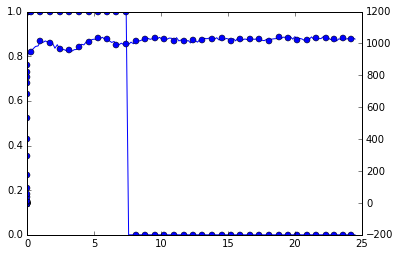

In [7]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

data_kneighbor = kneighbors_graph(XX, n_neighbors=10, include_self=False)

ward = AgglomerativeClustering(n_clusters=2, connectivity=data_kneighbor,linkage='ward').fit(XX)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(x,ward.labels_, marker='o',markevery=4)
ax2.plot(x,y, marker='o',markevery=4)

In [31]:
from sklearn.svm import SVR

svrmodel = SVR()
svrmodel.fit(XX,y)

predx = np.linspace(0.,max_domain,100)[:,np.newaxis]
predy = svrmodel.predict(predx)

plt.plot(x,y,'o',markevery=4)
plt.plot(predx,predy)

/site/x86/anaconda-1.8/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: X and y have incompatible shapes.
X has 1 samples, but y has 259.

In [9]:
from sklearn.svm import SVC

svcmodel = SVC(kernel='linear', gamma=400)
svcmodel.fit(XX, y)

predy = svcmodel.predict(predx)

plt.plot(x,y,'o')
plt.plot(predx,predy,lw='3')

ValueError: Unknown label type: array([  1.78041967e+00,  -2.38163803e+00,  -3.07496885e+00,
        -7.93139375e+00,  -1.34112360e+00,   2.12760327e+00,
        -7.23806292e+00,   4.20863212e+00,   3.92721650e-01,
        -7.23806292e+00,  -8.27857735e+00,  -3.76933605e+00,
        -2.03445443e+00,  -4.46266688e+00,   3.86144852e+00,
         1.08708885e+00,   2.82093410e+00,   1.78041967e+00,
        -5.85036490e+00,   1.08708885e+00,  -4.46266688e+00,
        -3.42215245e+00,  -3.00609177e-01,  -2.03445443e+00,
         7.39905247e-01,  -7.23806292e+00,   4.20863212e+00,
        -5.85036490e+00,  -4.46266688e+00,   8.71787342e+00,
        -2.03445443e+00,   3.92721650e-01,   1.78041967e+00,
         9.06505701e+00,   1.08708885e+00,  -2.38163803e+00,
         8.02454259e+00,  -3.42215245e+00,   8.02454259e+00,
        -4.11651965e+00,   7.39905247e-01,   7.67735899e+00,
         1.08708885e+00,   8.71787342e+00,  -7.23806292e+00,
         2.12760327e+00,   2.12760327e+00,   7.39905247e-01,
         1.08708885e+00,  -5.15703407e+00,   7.39905247e-01,
        -4.46266688e+00,   5.24914654e+00,  -6.47792775e-01,
        -3.42215245e+00,   1.14932695e+01,  -5.85036490e+00,
         6.63684457e+00,  -9.93940004e-01,   7.33017539e+00,
         7.33017539e+00,   9.41120424e+00,   4.20863212e+00,
        -2.72882163e+00,   1.07989023e+01,   6.98402816e+00,
         4.20863212e+00,   1.28799311e+01,   1.42676291e+01,
         1.84296868e+01,   1.07989023e+01,   2.77953530e+01,
         3.54261376e+01,   3.26517779e+01,   4.75661635e+01,
         4.40984730e+01,   5.51979844e+01,   6.94190391e+01,
         7.67036765e+01,   9.05775476e+01,   9.19652456e+01,
         1.20408391e+02,   1.31160719e+02,   1.58216167e+02,
         1.73824920e+02,   1.92555216e+02,   2.33485571e+02,
         2.41116356e+02,   2.96267766e+02,   3.09795489e+02,
         3.44481722e+02,   3.74312566e+02,   4.00673646e+02,
         4.50622484e+02,   4.64843539e+02,   5.12364164e+02,
         5.34910371e+02,   5.68208905e+02,   6.09832591e+02,
         6.35154194e+02,   6.81633268e+02,   7.12504627e+02,
         7.46150344e+02,   7.34703649e+02,   7.51700100e+02,
         7.86040185e+02,   7.79102732e+02,   7.97485844e+02,
         7.89161729e+02,   7.95404815e+02,   8.06851510e+02,
         8.01648938e+02,   8.22460263e+02,   8.16910507e+02,
         8.47087498e+02,   8.52291107e+02,   8.62350104e+02,
         8.96337824e+02,   9.04670230e+02,   9.35293589e+02,
         9.45642218e+02,   9.66330040e+02,   9.81433078e+02,
         9.84438679e+02,   1.01286828e+03,   1.00657508e+03,
         1.01604465e+03,   1.00807496e+03,   1.00353944e+03,
         1.00242494e+03,   9.70388493e+02,   9.92391353e+02,
         9.63866522e+02,   9.62809563e+02,   9.60401788e+02,
         9.52947032e+02,   9.61312210e+02,   9.51527001e+02,
         9.61192627e+02,   9.62467045e+02,   9.77759770e+02,
         9.95002034e+02,   9.91229198e+02,   1.00938453e+03,
         1.00629139e+03,   1.02173910e+03,   1.02624725e+03,
         1.02679697e+03,   1.03753318e+03,   1.03016737e+03,
         1.03889134e+03,   1.02695985e+03,   1.02518010e+03,
         1.01654088e+03,   1.00661246e+03,   1.01264371e+03,
         9.90069628e+02,   9.92166965e+02,   1.00201851e+03,
         9.92782358e+02,   9.99355386e+02,   9.94327274e+02,
         1.00856727e+03,   9.98417989e+02,   1.01485092e+03,
         1.01494681e+03,   1.01823047e+03,   1.02629068e+03,
         1.02605815e+03,   1.03280900e+03,   1.02625165e+03,
         1.03012770e+03,   1.03146293e+03,   1.02963944e+03,
         1.03849982e+03,   1.02598136e+03,   1.03008590e+03,
         1.02603817e+03,   1.03385894e+03,   1.03261179e+03,
         1.01489723e+03,   1.03666179e+03,   1.01622432e+03,
         1.02247833e+03,   1.01606731e+03,   1.01398908e+03,
         1.01839055e+03,   1.00342296e+03,   1.02069130e+03,
         1.01800945e+03,   1.00860060e+03,   1.02360711e+03,
         1.02089509e+03,   1.03215523e+03,   1.02971115e+03,
         1.03451482e+03,   1.02871712e+03,   1.02625107e+03,
         1.03614284e+03,   1.02193785e+03,   1.03690144e+03,
         1.02395639e+03,   1.03169544e+03,   1.02718389e+03,
         1.01853161e+03,   1.03014257e+03,   1.01678954e+03,
         1.03461224e+03,   1.02545010e+03,   1.02161978e+03,
         1.02840128e+03,   1.02395502e+03,   1.03096616e+03,
         1.02766854e+03,   1.02640646e+03,   1.02834085e+03,
         1.02500230e+03,   1.02049985e+03,   1.01774683e+03,
         1.02603702e+03,   1.01750099e+03,   1.02692054e+03,
         1.02939767e+03,   1.03072359e+03,   1.04011727e+03,
         1.03054696e+03,   1.03964707e+03,   1.03842938e+03,
         1.03549817e+03,   1.04368411e+03,   1.02736557e+03,
         1.04290640e+03,   1.02294346e+03,   1.03218680e+03,
         1.02810236e+03,   1.01922879e+03,   1.02332875e+03,
         1.02655669e+03,   1.04127626e+03,   1.02514122e+03,
         1.03673334e+03,   1.03016563e+03,   1.03087122e+03,
         1.04299091e+03,   1.03315649e+03,   1.03780002e+03,
         1.02556745e+03,   1.02581901e+03,   1.02965963e+03,
         1.01642679e+03,   1.02909488e+03,   1.02581801e+03,
         1.03708027e+03,   1.02726267e+03,   1.02923943e+03,
         1.03232641e+03,   1.02916978e+03,   1.03502885e+03,
         1.02759263e+03])

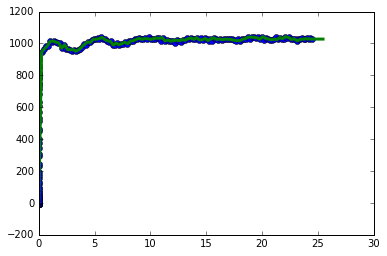

In [24]:
svcmodel = SVC(kernel='poly', gamma=40)
svcmodel.fit(XX, y)

predy = svcmodel.predict(predx)

plt.plot(x,y,'o')
plt.plot(predx,predy,lw='3')

In [10]:
from sklearn.svm import SVC

svcmodel = SVC(kernel='rbf', gamma=1000)
svcmodel.fit(XX, y)

predy = svcmodel.predict(predx)

plt.plot(x,y,'o')
plt.plot(predx,predy,lw='3')

ValueError: Unknown label type: array([  1.78041967e+00,  -2.38163803e+00,  -3.07496885e+00,
        -7.93139375e+00,  -1.34112360e+00,   2.12760327e+00,
        -7.23806292e+00,   4.20863212e+00,   3.92721650e-01,
        -7.23806292e+00,  -8.27857735e+00,  -3.76933605e+00,
        -2.03445443e+00,  -4.46266688e+00,   3.86144852e+00,
         1.08708885e+00,   2.82093410e+00,   1.78041967e+00,
        -5.85036490e+00,   1.08708885e+00,  -4.46266688e+00,
        -3.42215245e+00,  -3.00609177e-01,  -2.03445443e+00,
         7.39905247e-01,  -7.23806292e+00,   4.20863212e+00,
        -5.85036490e+00,  -4.46266688e+00,   8.71787342e+00,
        -2.03445443e+00,   3.92721650e-01,   1.78041967e+00,
         9.06505701e+00,   1.08708885e+00,  -2.38163803e+00,
         8.02454259e+00,  -3.42215245e+00,   8.02454259e+00,
        -4.11651965e+00,   7.39905247e-01,   7.67735899e+00,
         1.08708885e+00,   8.71787342e+00,  -7.23806292e+00,
         2.12760327e+00,   2.12760327e+00,   7.39905247e-01,
         1.08708885e+00,  -5.15703407e+00,   7.39905247e-01,
        -4.46266688e+00,   5.24914654e+00,  -6.47792775e-01,
        -3.42215245e+00,   1.14932695e+01,  -5.85036490e+00,
         6.63684457e+00,  -9.93940004e-01,   7.33017539e+00,
         7.33017539e+00,   9.41120424e+00,   4.20863212e+00,
        -2.72882163e+00,   1.07989023e+01,   6.98402816e+00,
         4.20863212e+00,   1.28799311e+01,   1.42676291e+01,
         1.84296868e+01,   1.07989023e+01,   2.77953530e+01,
         3.54261376e+01,   3.26517779e+01,   4.75661635e+01,
         4.40984730e+01,   5.51979844e+01,   6.94190391e+01,
         7.67036765e+01,   9.05775476e+01,   9.19652456e+01,
         1.20408391e+02,   1.31160719e+02,   1.58216167e+02,
         1.73824920e+02,   1.92555216e+02,   2.33485571e+02,
         2.41116356e+02,   2.96267766e+02,   3.09795489e+02,
         3.44481722e+02,   3.74312566e+02,   4.00673646e+02,
         4.50622484e+02,   4.64843539e+02,   5.12364164e+02,
         5.34910371e+02,   5.68208905e+02,   6.09832591e+02,
         6.35154194e+02,   6.81633268e+02,   7.12504627e+02,
         7.46150344e+02,   7.34703649e+02,   7.51700100e+02,
         7.86040185e+02,   7.79102732e+02,   7.97485844e+02,
         7.89161729e+02,   7.95404815e+02,   8.06851510e+02,
         8.01648938e+02,   8.22460263e+02,   8.16910507e+02,
         8.47087498e+02,   8.52291107e+02,   8.62350104e+02,
         8.96337824e+02,   9.04670230e+02,   9.35293589e+02,
         9.45642218e+02,   9.66330040e+02,   9.81433078e+02,
         9.84438679e+02,   1.01286828e+03,   1.00657508e+03,
         1.01604465e+03,   1.00807496e+03,   1.00353944e+03,
         1.00242494e+03,   9.70388493e+02,   9.92391353e+02,
         9.63866522e+02,   9.62809563e+02,   9.60401788e+02,
         9.52947032e+02,   9.61312210e+02,   9.51527001e+02,
         9.61192627e+02,   9.62467045e+02,   9.77759770e+02,
         9.95002034e+02,   9.91229198e+02,   1.00938453e+03,
         1.00629139e+03,   1.02173910e+03,   1.02624725e+03,
         1.02679697e+03,   1.03753318e+03,   1.03016737e+03,
         1.03889134e+03,   1.02695985e+03,   1.02518010e+03,
         1.01654088e+03,   1.00661246e+03,   1.01264371e+03,
         9.90069628e+02,   9.92166965e+02,   1.00201851e+03,
         9.92782358e+02,   9.99355386e+02,   9.94327274e+02,
         1.00856727e+03,   9.98417989e+02,   1.01485092e+03,
         1.01494681e+03,   1.01823047e+03,   1.02629068e+03,
         1.02605815e+03,   1.03280900e+03,   1.02625165e+03,
         1.03012770e+03,   1.03146293e+03,   1.02963944e+03,
         1.03849982e+03,   1.02598136e+03,   1.03008590e+03,
         1.02603817e+03,   1.03385894e+03,   1.03261179e+03,
         1.01489723e+03,   1.03666179e+03,   1.01622432e+03,
         1.02247833e+03,   1.01606731e+03,   1.01398908e+03,
         1.01839055e+03,   1.00342296e+03,   1.02069130e+03,
         1.01800945e+03,   1.00860060e+03,   1.02360711e+03,
         1.02089509e+03,   1.03215523e+03,   1.02971115e+03,
         1.03451482e+03,   1.02871712e+03,   1.02625107e+03,
         1.03614284e+03,   1.02193785e+03,   1.03690144e+03,
         1.02395639e+03,   1.03169544e+03,   1.02718389e+03,
         1.01853161e+03,   1.03014257e+03,   1.01678954e+03,
         1.03461224e+03,   1.02545010e+03,   1.02161978e+03,
         1.02840128e+03,   1.02395502e+03,   1.03096616e+03,
         1.02766854e+03,   1.02640646e+03,   1.02834085e+03,
         1.02500230e+03,   1.02049985e+03,   1.01774683e+03,
         1.02603702e+03,   1.01750099e+03,   1.02692054e+03,
         1.02939767e+03,   1.03072359e+03,   1.04011727e+03,
         1.03054696e+03,   1.03964707e+03,   1.03842938e+03,
         1.03549817e+03,   1.04368411e+03,   1.02736557e+03,
         1.04290640e+03,   1.02294346e+03,   1.03218680e+03,
         1.02810236e+03,   1.01922879e+03,   1.02332875e+03,
         1.02655669e+03,   1.04127626e+03,   1.02514122e+03,
         1.03673334e+03,   1.03016563e+03,   1.03087122e+03,
         1.04299091e+03,   1.03315649e+03,   1.03780002e+03,
         1.02556745e+03,   1.02581901e+03,   1.02965963e+03,
         1.01642679e+03,   1.02909488e+03,   1.02581801e+03,
         1.03708027e+03,   1.02726267e+03,   1.02923943e+03,
         1.03232641e+03,   1.02916978e+03,   1.03502885e+03,
         1.02759263e+03])

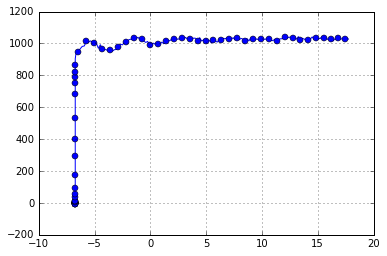

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.5)
pca.fit(XX)

XX_reduced = pca.transform(XX)

plt.plot(XX_reduced,y,marker='o',markevery=4)
plt.grid(True)

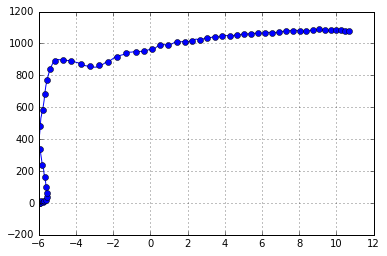

In [35]:
pca = PCA(n_components=1)
pca.fit(XX)

XX_reduced = pca.transform(XX)

plt.plot(XX_reduced,y,marker='o',markevery=4)
plt.grid(True)

In [ ]:
sec1_x = XX_reduced[XX_reduced < 0]
sec1_y = y[np.array(XX_reduced).T[0] < 0]

sec2_x = XX_reduced[XX_reduced > 0]
sec2_y = y[np.array(XX_reduced).T[0] > 0]

print len(sec2_x),len(sec2_y)

plt.plot(sec1_x,sec1_y,marker='o',c='r',markevery=4)
plt.plot(sec2_x,sec2_y,marker='o',c='b',markevery=4)
plt.grid(True)

## 22

118 118


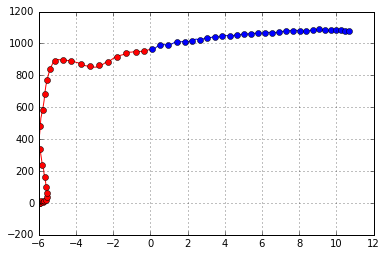

In [29]:
sec1_x = XX_reduced[XX_reduced < 0]
sec1_y = y[np.array(XX_reduced).T[0] < 0]

sec2_x = XX_reduced[XX_reduced > 0]
sec2_y = y[np.array(XX_reduced).T[0] > 0]

print len(sec2_x),len(sec2_y)

plt.plot(sec1_x,sec1_y,marker='o',c='r',markevery=4)
plt.plot(sec2_x,sec2_y,marker='o',c='b',markevery=4)
plt.grid(True)